In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from qs_mps.utils import get_precision, swap_columns, create_sequential_colors

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot Energies for 1D phase spaces

There are two methods:
1. for each point in the phase space $h$: plot the cumulative sum of the energy density for different $\chi$ 
2. choose a point in the phase space, e.g. the critical point $h_{crit}$: plot energy density for different $\chi$


In [11]:
model = "Z2_dual"
path = "mac"
# 6x6 test diff bond dim
L, l, h_i, h_f, npoints, lx, ly = 20, 6, 0.5, 1.5, 50, 10, 2 
chis = [4, 16, 32]
L, l, chi, h_i, h_f, npoints = 40, 6, 128, 0.8, 1.0, 30
chis = [64, 128]
cxs = [[2,38],[3,37],[4,36],[6,34],[7,33],[8,32],[9,31],[10,30]]
cx = [2,38]
cy = [3,3]

lin, log = True, False
if log:
    interval = np.logspace(h_i, h_f, npoints)
    precision = int(np.max((np.abs(h_i),np.abs(h_f))))
elif lin:
    interval = np.linspace(h_i, h_f, npoints)
    num = (h_f - h_i) / npoints
    precision = get_precision(num)


if model == "Ising":
    model_path = "0_ISING"

elif model == "Z2_dual":
    model_path = "1_Z2"
    param_label = "h"
    boundcond = "obc"
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"

elif model == "ANNNI":
    model_path = "2_ANNNI"

elif model == "Cluster":
    model_path = "3_CLUSTER"
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f"/Users/fradm/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

### 1. All points plot

In [18]:
en_dens = []
chi = chis[-1]
energies = np.load(f"{parent_path}/results/energy_data/energies_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_{param_label}_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
energies = energies.reshape((npoints,energies.shape[-1]))
for i, h in enumerate(interval):
    en_dens_h = np.abs(energies[i,-1] - energies[i])/L
    en_dens.append(en_dens_h)

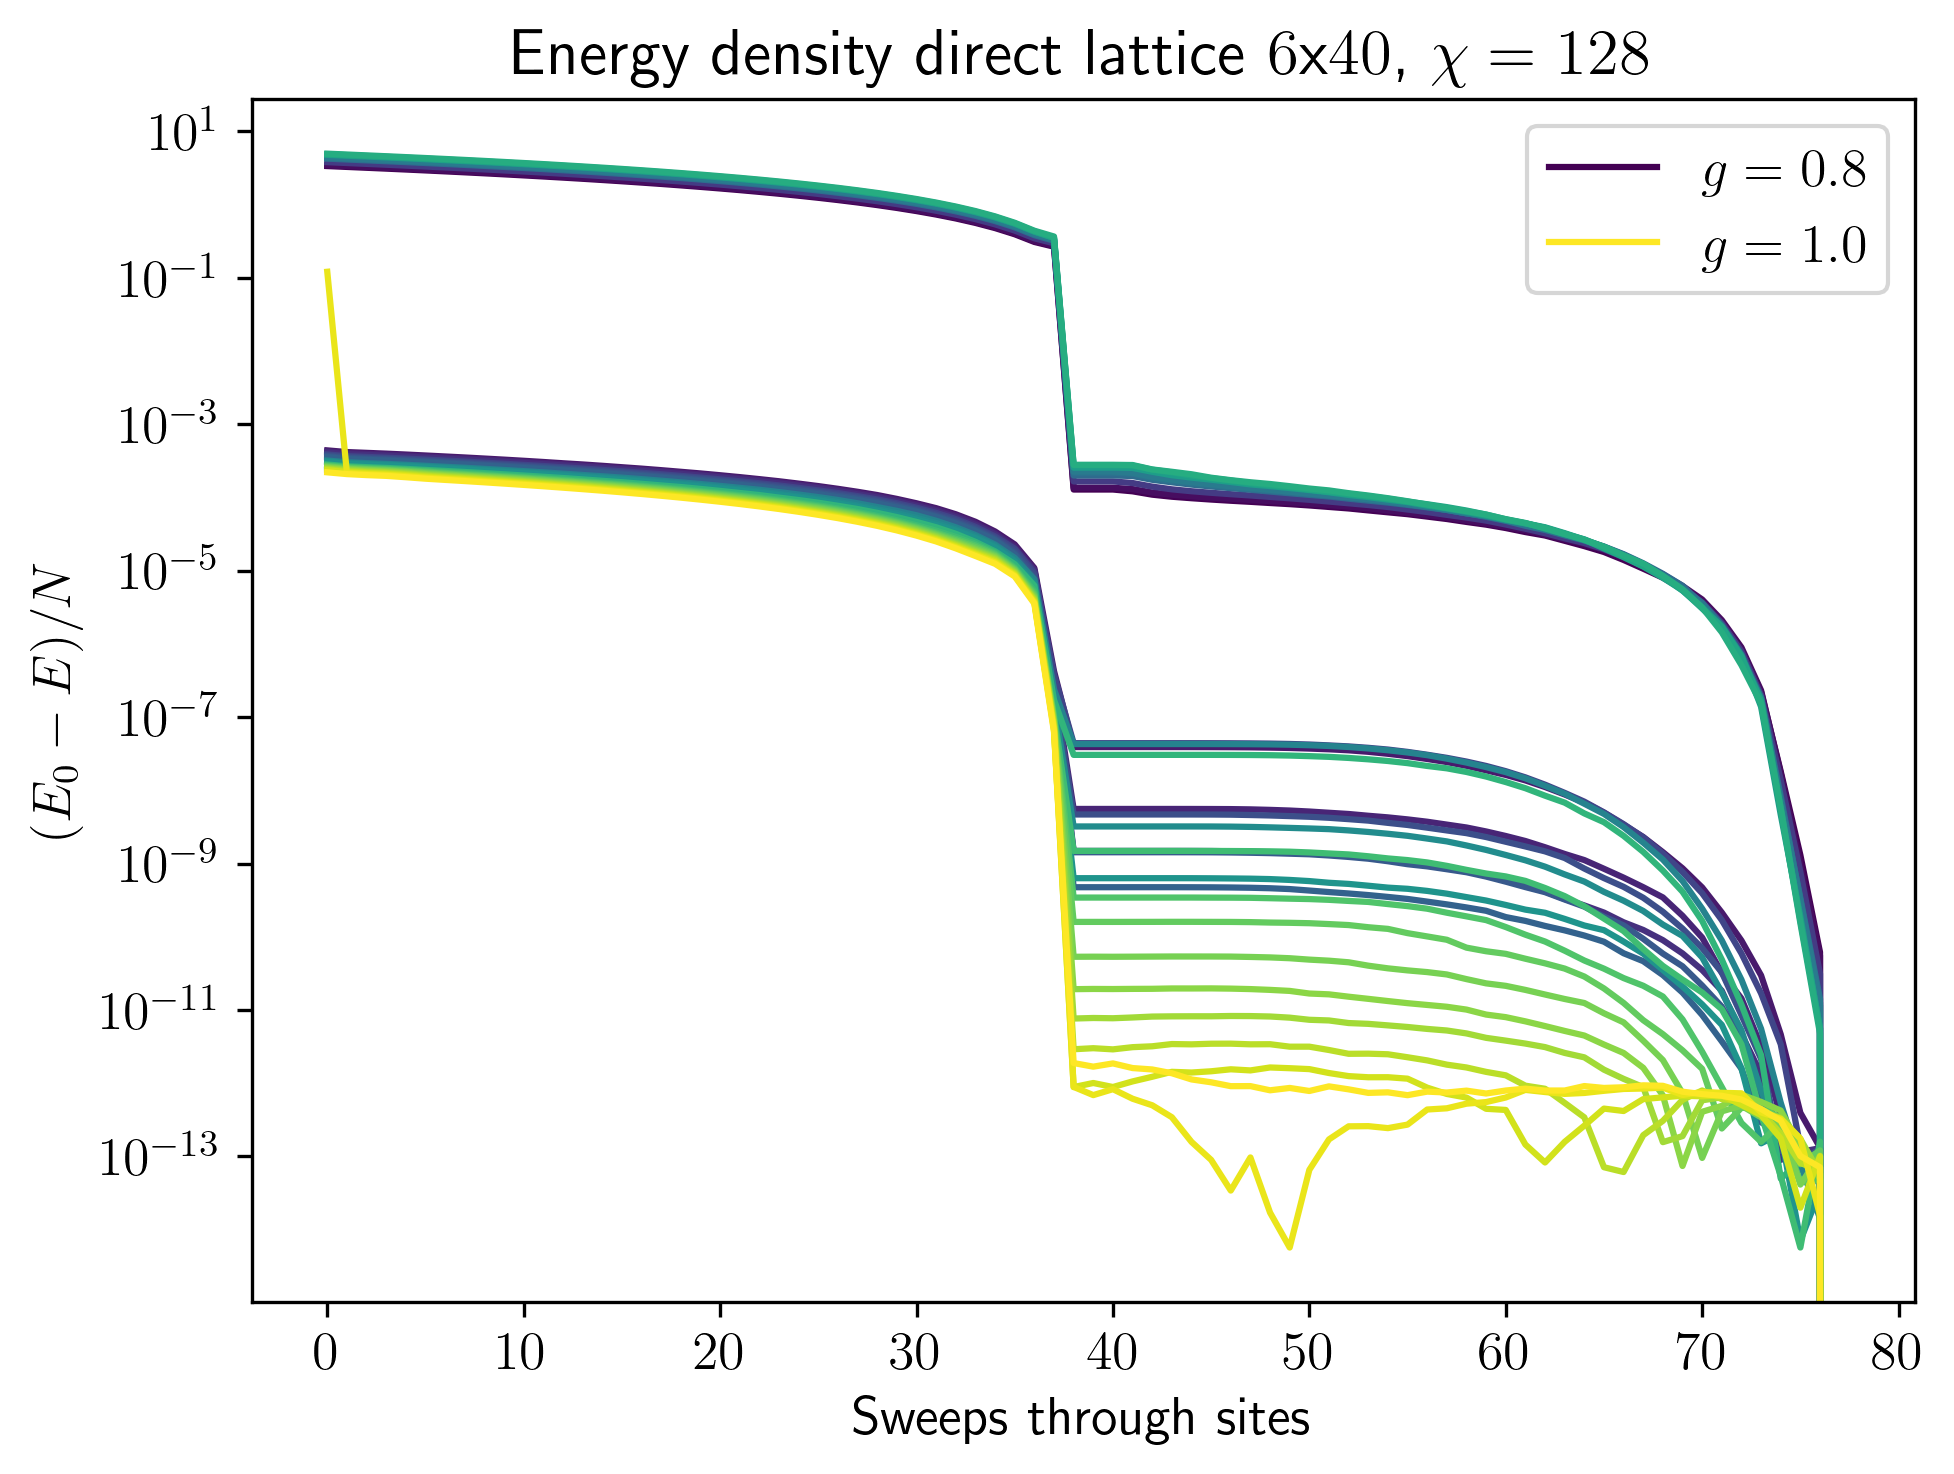

In [19]:
colors = create_sequential_colors(num_colors=len(en_dens), colormap_name="viridis")
for i, ed in enumerate(en_dens):
    if i == 0 or i == (len(interval)-1):
        label = f"$g={interval[i]}$"
    else:
        label=None
    plt.plot(ed, color=colors[i], label=label)
plt.title(f"Energy density direct lattice ${l}$x${L}$, $\\chi={chi}$")
plt.ylabel("$(E_0 - E)/N$")
plt.xlabel("Sweeps through sites")
plt.yscale('log')
plt.legend()
plt.savefig(f"{parent_path}/figures/energy/energy_density_convergence_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_{param_label}_{hx_i}-{hx_f}_delta_{npoints}_chi_{chi}.png")
plt.show()

In [ ]:
en_dens = []
chi = chis[-1]
energies = np.load(f"{parent_path}/results/energy_data/energies_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_{param_label}_{hx_i}-{hx_f}_delta_{npoints}_chi_{chi}.npy")
energies = energies.reshape((npoints,energies.shape[-1]))
sum_en = np.sum(energies, axis=1)

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HP\AppData\Local\Temp\ipykernel_23812\4280008701.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.title(f"Cumulative energy direct lattice ${l}$x${L-1}$, $\chi={chi}$")
C:\Users\HP\AppData\Local\Temp\ipykernel_23812\4280008701.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\sum_i E_i $")


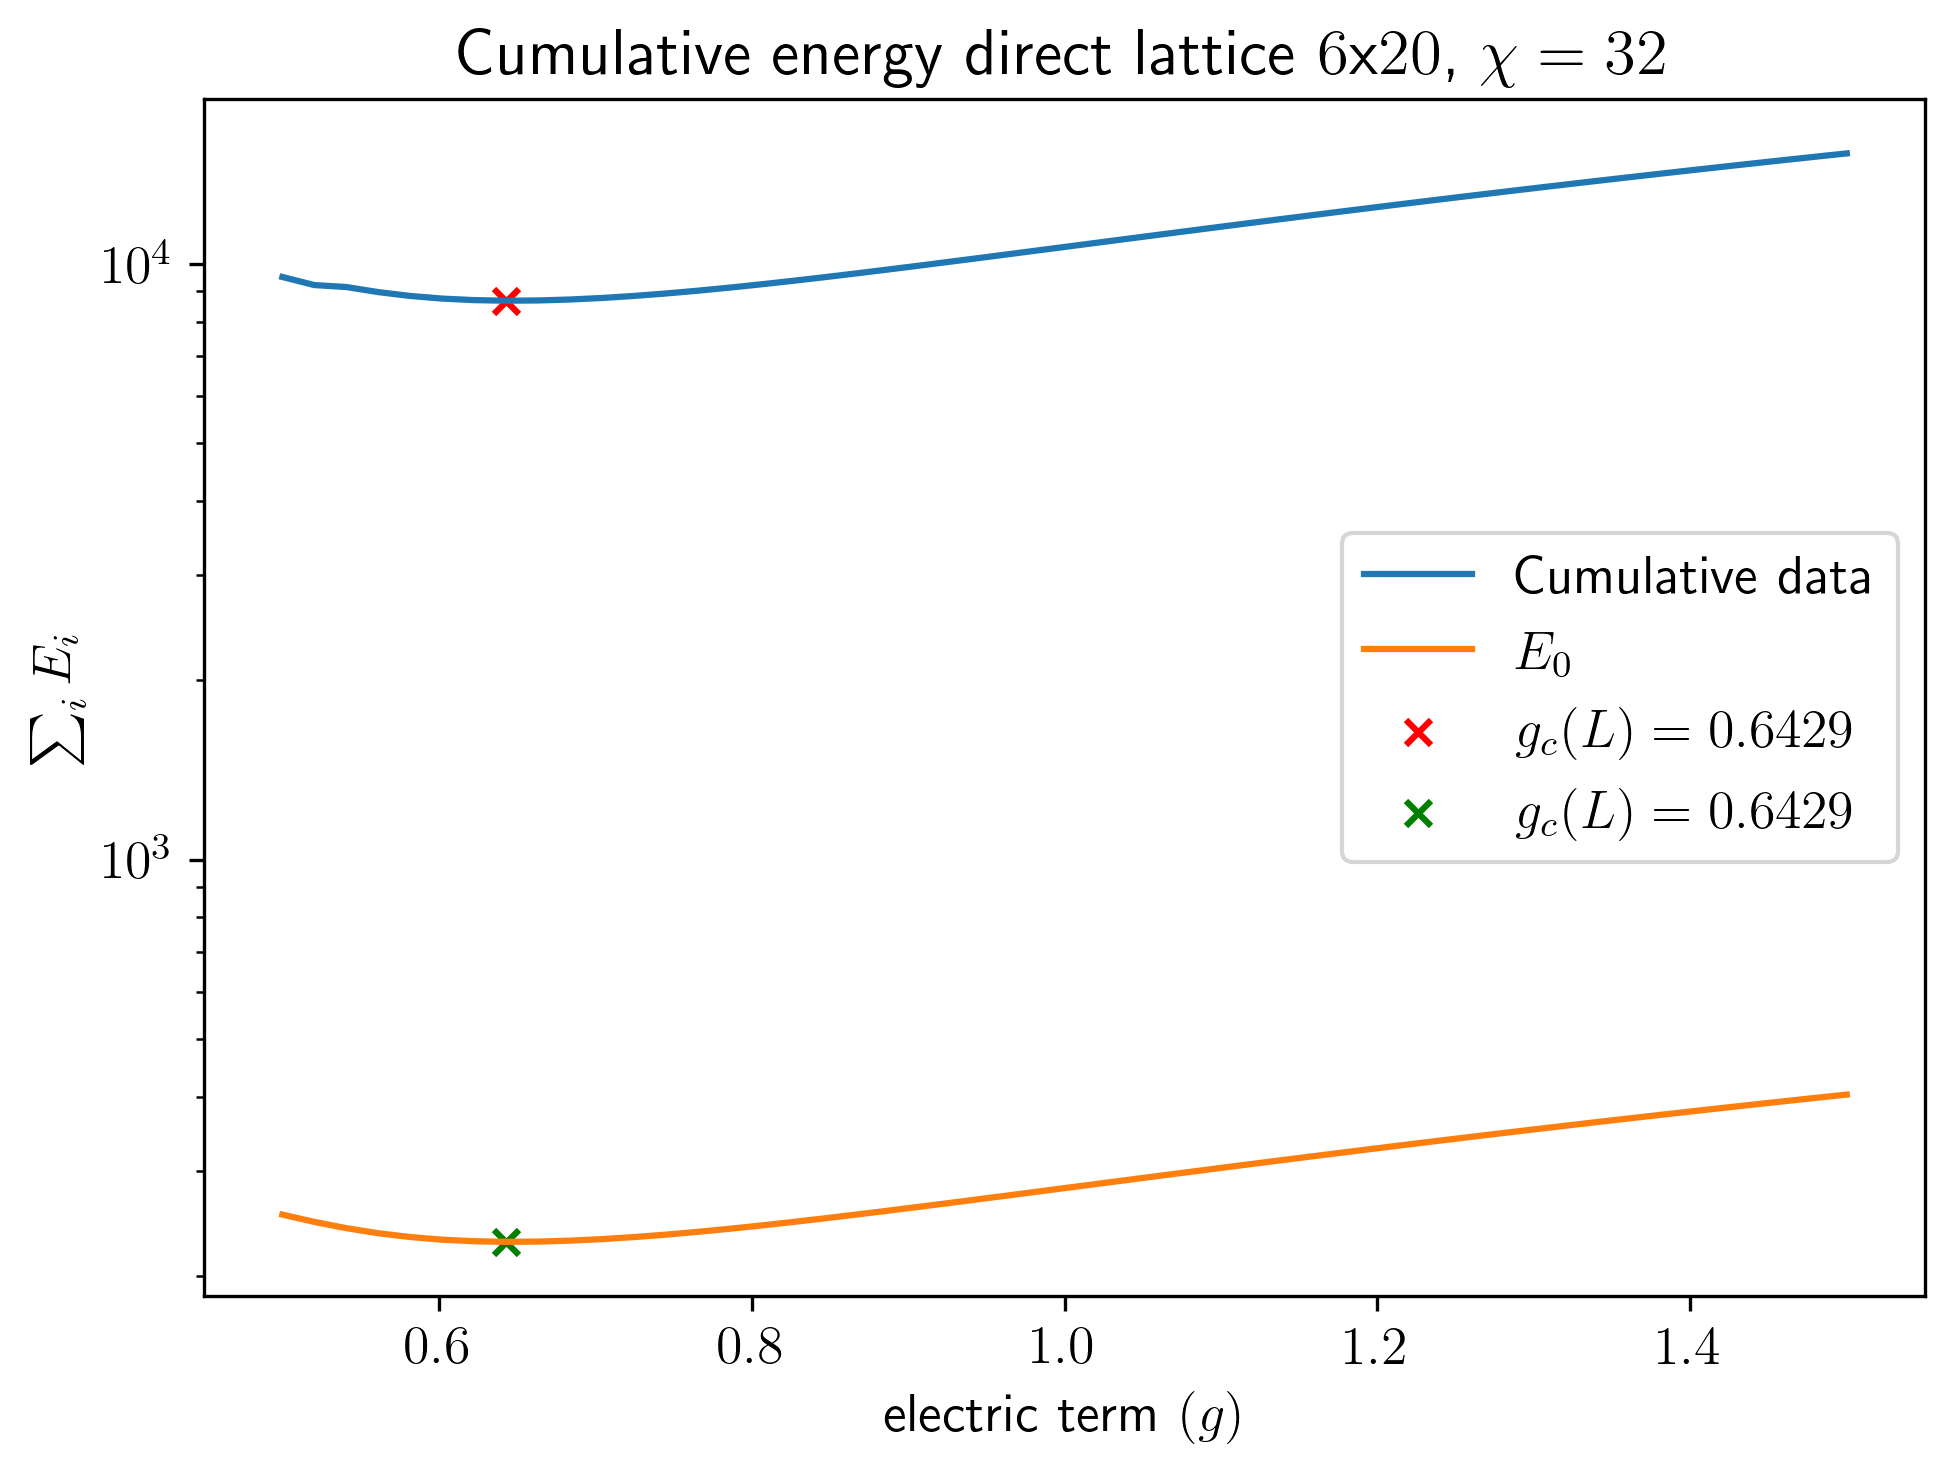

In [40]:
plt.plot(interval, np.abs(sum_en), label="Cumulative data")
plt.plot(interval, np.abs(energies[:,-1]), label="$E_0$")
plt.scatter(interval[np.argmin(np.abs(sum_en))], np.min(np.abs(sum_en)), marker='x', color='red', label=f"$g_c(L)={round(interval[np.argmin(np.abs(sum_en))],4)}$")
plt.scatter(interval[np.argmin(np.abs(energies[:,-1]))], np.min(np.abs(energies[:,-1])), marker='x', color='green', label=f"$g_c(L)={round(interval[np.argmin(np.abs(energies[:,-1]))],4)}$")
plt.title(f"Cumulative energy direct lattice ${l}$x${L}$, $\chi={chi}$")
plt.ylabel("$\sum_i E_i $")
plt.xlabel("electric term $(g)$")
plt.yscale('log')
if log:
    plt.xscale('log')
plt.legend()
plt.savefig(f"{parent_path}/figures/energy/cumulative_and_last_energy_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_{param_label}_{hx_i}-{hx_f}_delta_{npoints}_chi_{chi}.png")
plt.show()
gc_L = round(interval[np.argmin(np.abs(energies[:,-1]))],precision)

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_56524/3358673513.py:3: SyntaxWarning: invalid escape sequence '\c'
  plt.title(f"Ground state energy direct lattice ${l}$x${L}$, $\chi={chi}$")


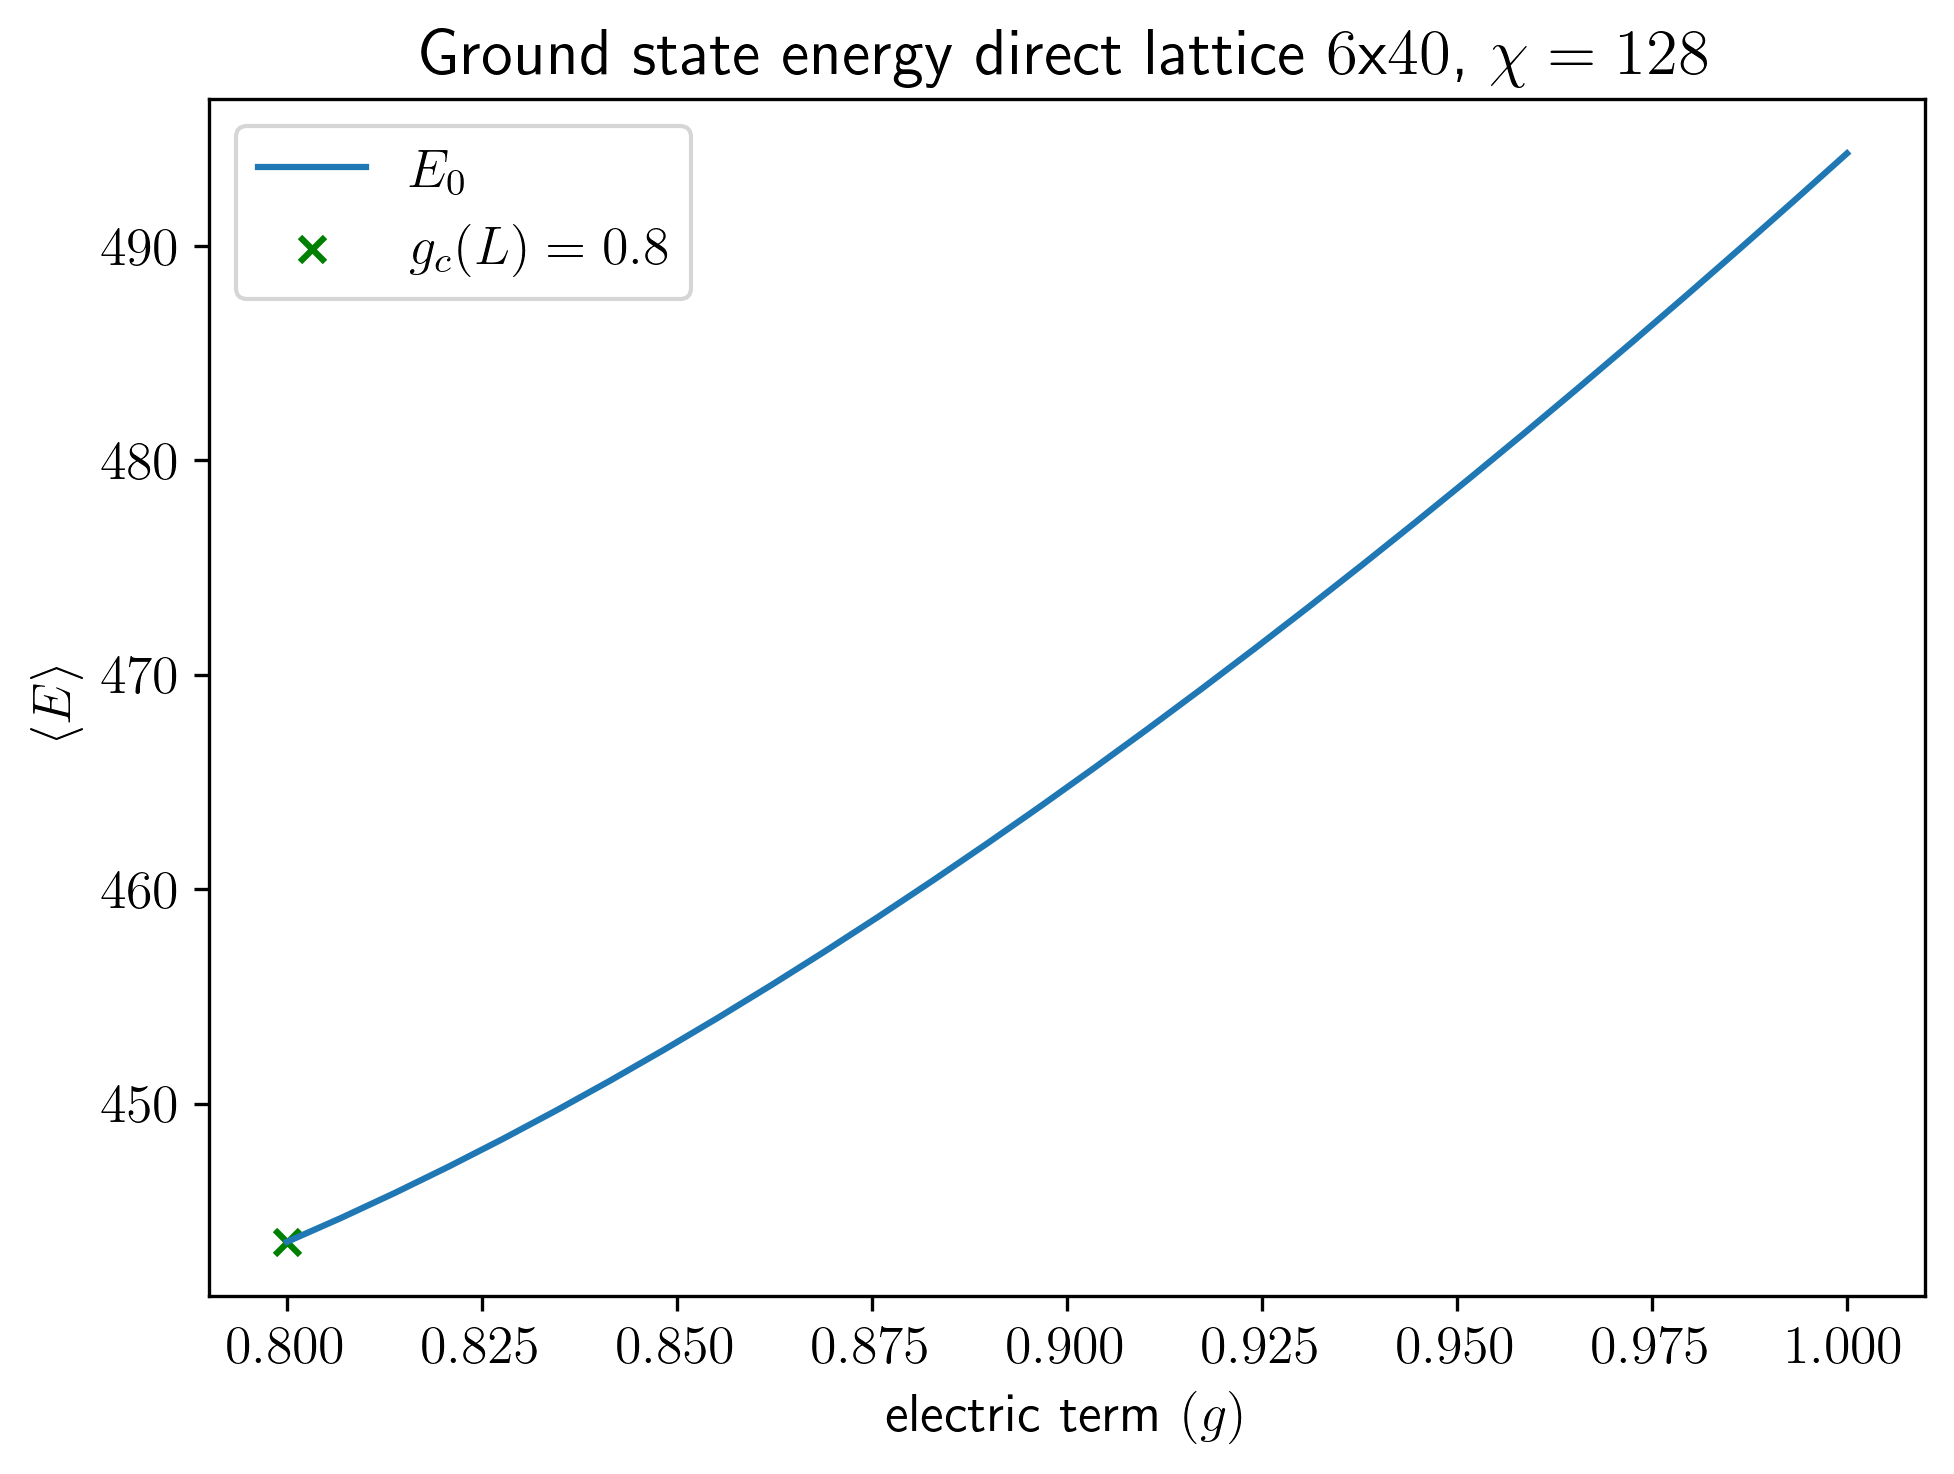

In [21]:
plt.plot(interval, np.abs(energies[:,-1]), label="$E_0$")
plt.scatter(interval[np.argmin(np.abs(energies[:,-1]))], np.min(np.abs(energies[:,-1])), marker='x', color='green', label=f"$g_c(L)={round(interval[np.argmin(np.abs(energies[:,-1]))],4)}$")
plt.title(f"Ground state energy direct lattice ${l}$x${L}$, $\chi={chi}$")
plt.ylabel("$\\langle E \\rangle $")
plt.xlabel("electric term $(g)$")
if log:
    plt.xscale('log')
plt.legend()
plt.savefig(f"{parent_path}/figures/energy/ground_energy_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_{param_label}_{hx_i}-{hx_f}_delta_{npoints}_chi_{chi}.png")
plt.show()
gc_L = round(interval[np.argmin(np.abs(energies[:,-1]))],precision)

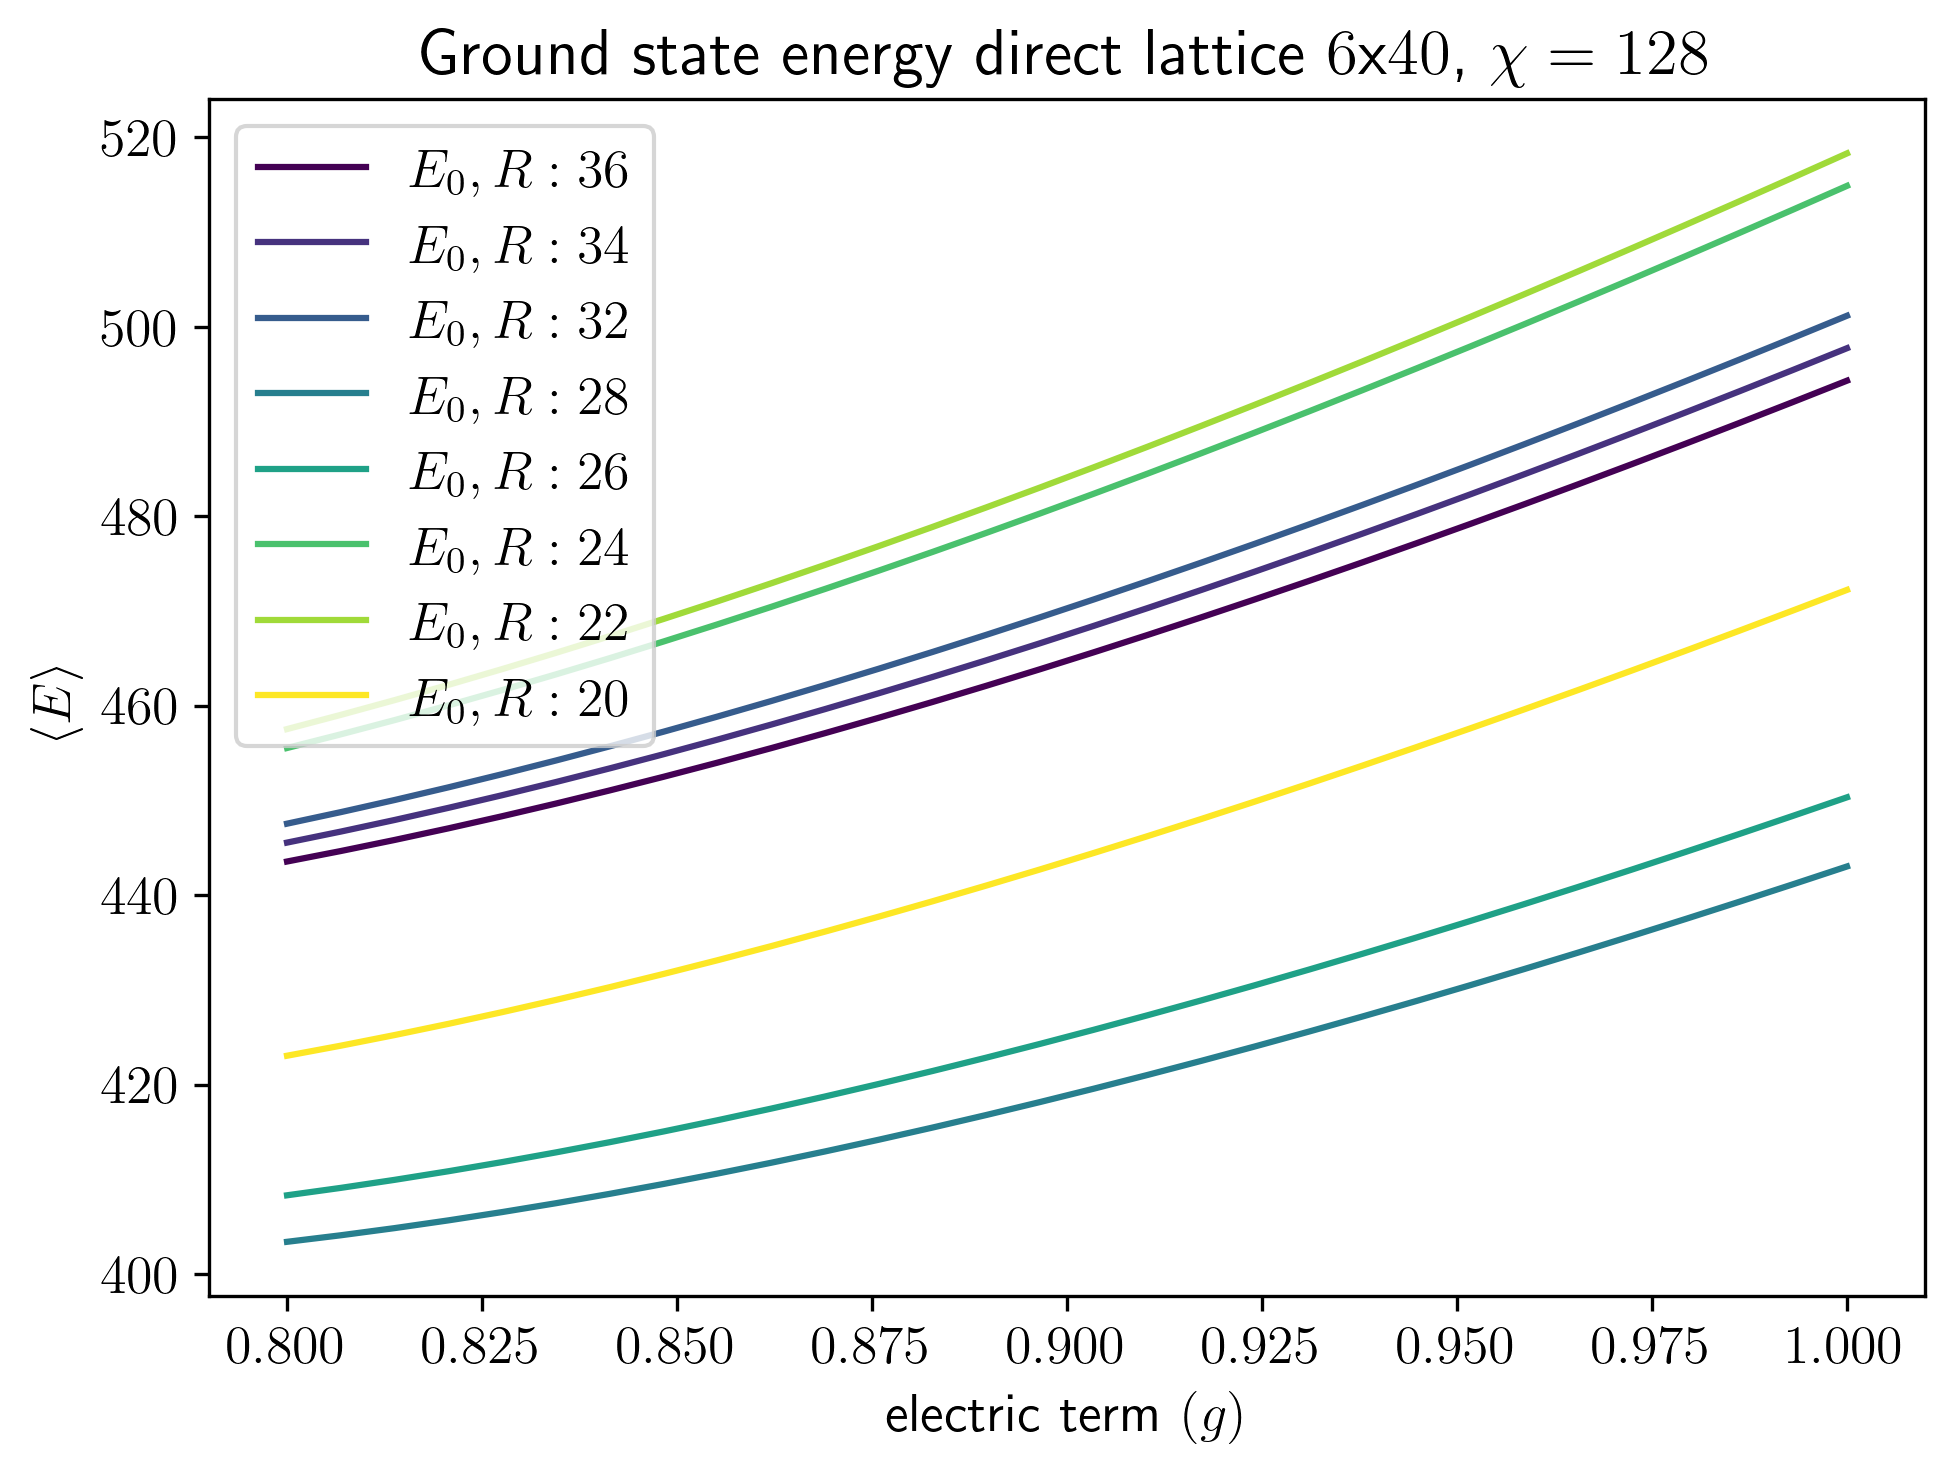

In [15]:
colors = create_sequential_colors(len(cxs))
for i, cx in enumerate(cxs):
    try:
        energies = np.load(f"{parent_path}/results/energy_data/energies_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_{param_label}_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        energies = energies.reshape((npoints,energies.shape[-1]))
        # gc_L = round(interval[np.argmin(np.abs(energies[:,-1]))],precision)
    except:
        energies = np.load(f"{parent_path}/results/energy_data/energy_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_{param_label}_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    
    try:
        plt.plot(interval, np.abs(energies[:,-1]), color=colors[i], label=f"$E_0, R:{cx[1]-cx[0]}$")
        # plt.scatter(interval[np.argmin(np.abs(energies[:,-1]))], np.min(np.abs(energies[:,-1])), marker='x', color='green', label=f"$g_c(L)={round(interval[np.argmin(np.abs(energies[:,-1]))],4)}$")    
    except:
        plt.plot(interval, np.abs(energies), color=colors[i], label=f"$E_0, R:{cx[1]-cx[0]}$")
    plt.title(f"Ground state energy direct lattice ${l}$x${L}$, $\chi={chi}$")
    plt.ylabel("$\\langle E \\rangle $")
    plt.xlabel("electric term $(g)$")
    if log:
        plt.xscale('log')
plt.legend()
plt.savefig(f"{parent_path}/figures/energy/ground_energy_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_{param_label}_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")
plt.show()

### 2. Specific point plot

In [42]:
print(interval)
target_param = gc_L

[0.5        0.52040816 0.54081633 0.56122449 0.58163265 0.60204082
 0.62244898 0.64285714 0.66326531 0.68367347 0.70408163 0.7244898
 0.74489796 0.76530612 0.78571429 0.80612245 0.82653061 0.84693878
 0.86734694 0.8877551  0.90816327 0.92857143 0.94897959 0.96938776
 0.98979592 1.01020408 1.03061224 1.05102041 1.07142857 1.09183673
 1.1122449  1.13265306 1.15306122 1.17346939 1.19387755 1.21428571
 1.23469388 1.25510204 1.2755102  1.29591837 1.31632653 1.33673469
 1.35714286 1.37755102 1.39795918 1.41836735 1.43877551 1.45918367
 1.47959184 1.5       ]


In [43]:
en_dens = []
for chi in chis:
    param_label = "h"
    energies = np.load(f"{parent_path}/results/energy_data/energies_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_{param_label}_{hx_i}-{hx_f}_delta_{npoints}_chi_{chi}.npy")
    energies = energies.reshape((npoints,energies.shape[-1]))
    # /Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/energy_data/energy_Z2_dual_direct_lattice_4x4_vacuum_sector_None-None_h_1.0--3.0_delta_50_chi_128.npy
    # Flag to track if the target tuple is found
    found = False

    # Iterate through the list of parameters
    for index, param in enumerate(interval):
        # Check if the current parameter matches the target tuple
        if round(param,3) == target_param:
            found = True
            break

    # If the target tuple is not found
    if not found:
        print(f"The tuple {target_param} is not in the parameter list.")

    en_dens_chi = np.abs(energies[index,-1] - energies[index])/L
    en_dens.append(en_dens_chi)

The tuple 0.64 is not in the parameter list.
The tuple 0.64 is not in the parameter list.
The tuple 0.64 is not in the parameter list.


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_23812\2522162858.py:2: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(ed, label=f"$\chi$: {chis[i]}")


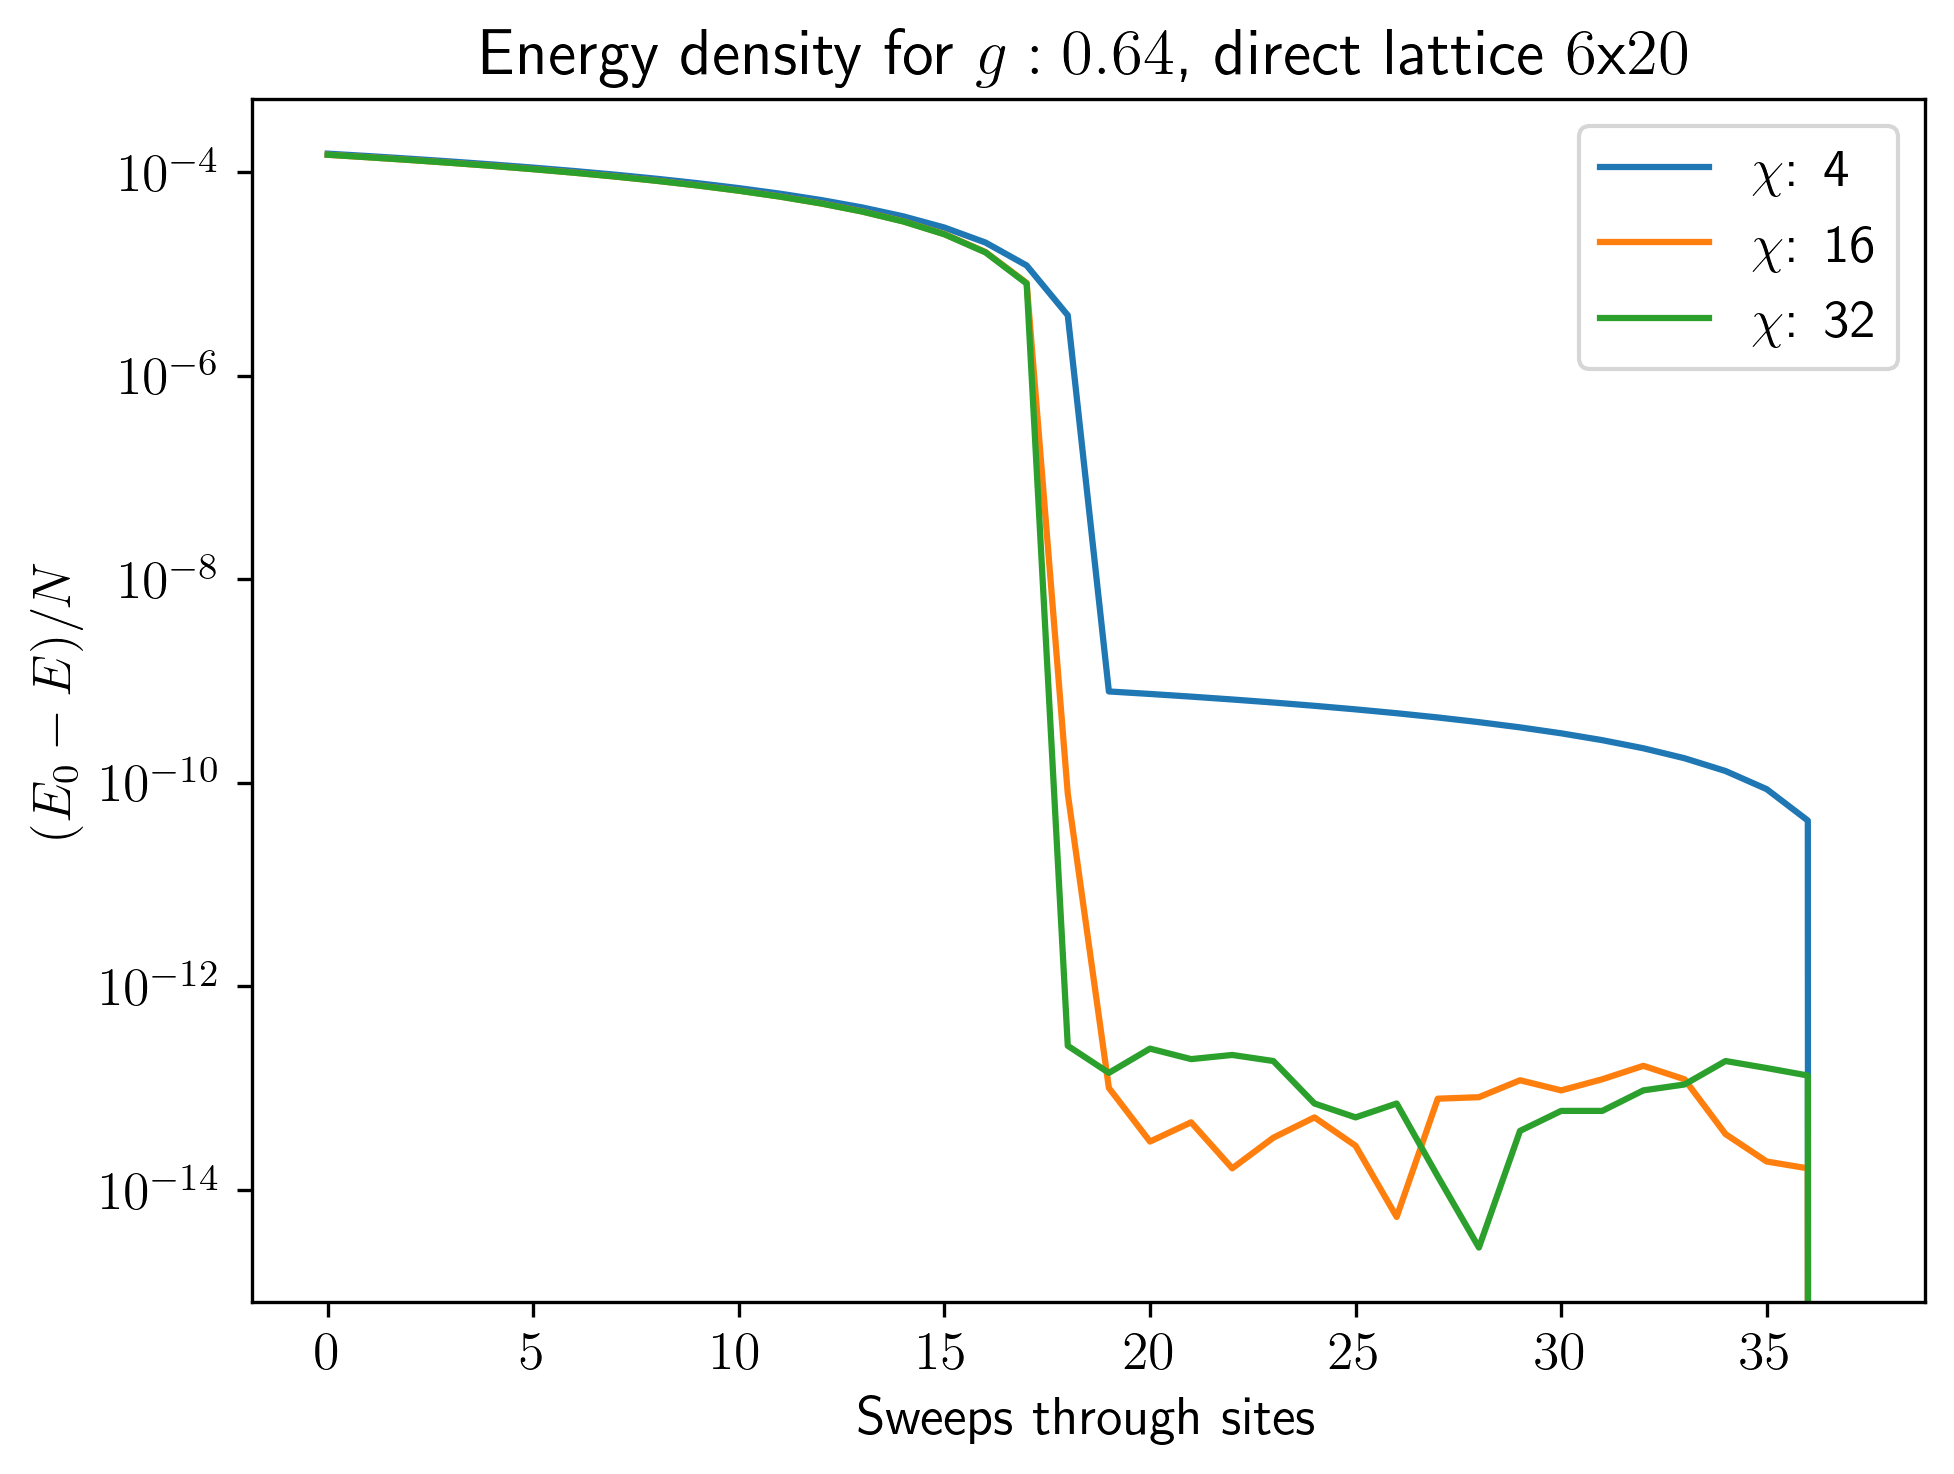

In [44]:
for i, ed in enumerate(en_dens):
    plt.plot(ed, label=f"$\chi$: {chis[i]}")
plt.legend()
plt.title(f"Energy density for $g:{target_param}$, direct lattice ${l}$x${L}$")
plt.ylabel("$(E_0 - E)/N$")
plt.xlabel("Sweeps through sites")
plt.yscale('log')
plt.savefig(f"{parent_path}/figures/energy/energy_density_convergence_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_{hx_i}-{hx_f}_ht_{target_param}_delta_{npoints}_chi_{chis}.png")
plt.show()

### Retrieve Energies

If our states were found by the DMRG but the energies not saved, we can simply get the energy by taking the expectation value of the Hamiltonian with the saved MPS:

$$ \langle \psi | H | \psi \rangle = E_0 $$

In [9]:
from qs_mps.mps_class import MPS
l, L, chi, h_i, h_f, npoints = 6, 40, 128, 0.8, 1.0, 30
d = 2**l
interval = np.linspace(h_i,h_f,npoints)
num = (h_f - h_i) / npoints
precision = get_precision(num)
boundcond = "obc"
cxs = [[6,34],[7,33],[10,30]]
charges_y = [3,3]
for charges_x in cxs:
    energies_ch = []
    for h in interval:
            print(f"Loading sites for h: {h:.{precision}f}")
            lattice_mps = MPS(L=L, d=d, model=model, chi=chi, h=h, bc=boundcond)
            lattice_mps.load_sites(path=path_tensor, precision=precision, cx=charges_x, cy=charges_y)
            print("getting exp val")
            lattice_mps.mpo(long="X", trans="Z")
            en_gs = lattice_mps.mpo_first_moment()
            energies_ch.append(en_gs)
    np.save(f"{parent_path}/results/energy_data/energy_{model}_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{charges_x}-{charges_y}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}", energies_ch)
    

Loading sites for h: 0.800


FileNotFoundError: /Users/fradm98/Desktop/projects/1_Z2/results/tensors/shapes_sites_Z2_dual_direct_lattice_6x40_bc_obc_[6, 34]-[3, 3]_chi_128_h_0.800 not found.

## Plot Energies for 2D phase spaces

There are two methods:
1. choose a point in the phase space, e.g. the critical point $h_{crit}$: plot energy density for different $\chi$
2. for each point in the phase space $h$: plot the cumulative sum of the energy density for different $\chi$ 

### 1. Specific point plot

In [ ]:
model = "ANNNI"
path = "mac"
L = 12
npoints = 16
chis = [4, 16, 64]
hx_i = 0.01
hx_f = 1.5
hy_i = 0.01
hy_f = 1.5
hxs = np.linspace(hx_i, hx_f, npoints)
hys = np.linspace(hy_i, hy_f, npoints)
num = (hx_f - hx_i) / npoints
precision = get_precision(num)

if model == "Ising":
    model_path = "0_ISING"
    param_labels = ["h","J"]

elif model == "Z2":
    model_path = "1_Z2"
    param_labels = ["g","J"]

elif model == "ANNNI":
    model_path = "2_ANNNI"
    param_labels = ["k","h"]

elif model == "Cluster":
    model_path = "3_CLUSTER"
    param_labels = ["h","J"]
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f"/Users/fradm/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

In [ ]:
target_param = [0.51,0.51]
params = [[round(hx,precision),round(hy,precision)] for hy in hys for hx in hxs]
print(params)

[[0.01, 0.01], [0.11, 0.01], [0.21, 0.01], [0.31, 0.01], [0.41, 0.01], [0.51, 0.01], [0.61, 0.01], [0.71, 0.01], [0.8, 0.01], [0.9, 0.01], [1.0, 0.01], [1.1, 0.01], [1.2, 0.01], [1.3, 0.01], [1.4, 0.01], [1.5, 0.01], [0.01, 0.11], [0.11, 0.11], [0.21, 0.11], [0.31, 0.11], [0.41, 0.11], [0.51, 0.11], [0.61, 0.11], [0.71, 0.11], [0.8, 0.11], [0.9, 0.11], [1.0, 0.11], [1.1, 0.11], [1.2, 0.11], [1.3, 0.11], [1.4, 0.11], [1.5, 0.11], [0.01, 0.21], [0.11, 0.21], [0.21, 0.21], [0.31, 0.21], [0.41, 0.21], [0.51, 0.21], [0.61, 0.21], [0.71, 0.21], [0.8, 0.21], [0.9, 0.21], [1.0, 0.21], [1.1, 0.21], [1.2, 0.21], [1.3, 0.21], [1.4, 0.21], [1.5, 0.21], [0.01, 0.31], [0.11, 0.31], [0.21, 0.31], [0.31, 0.31], [0.41, 0.31], [0.51, 0.31], [0.61, 0.31], [0.71, 0.31], [0.8, 0.31], [0.9, 0.31], [1.0, 0.31], [1.1, 0.31], [1.2, 0.31], [1.3, 0.31], [1.4, 0.31], [1.5, 0.31], [0.01, 0.41], [0.11, 0.41], [0.21, 0.41], [0.31, 0.41], [0.41, 0.41], [0.51, 0.41], [0.61, 0.41], [0.71, 0.41], [0.8, 0.41], [0.9, 0.41

In [ ]:
en_dens = []
for chi in chis:
    energies = np.load(f"{parent_path}/results/energy_data/energies_{model}_L_{L}_{param_labels[0]}_{hx_i}-{hx_f}_{param_labels[1]}_{hy_i}-{hy_f}_delta_{npoints}_chi_{chi}.npy")
    energies = energies.reshape((npoints*npoints,energies.shape[-1]))

    # Flag to track if the target tuple is found
    found = False

    # Iterate through the list of parameters
    for index, param in enumerate(params):
        # Check if the current parameter matches the target tuple
        if param == target_param:
            found = True
            break

    # If the target tuple is not found
    if not found:
        print(f"The tuple {target_param} is not in the parameter list.")

    en_dens_chi = np.abs(energies[index,-1] - energies[index])/L
    en_dens.append(en_dens_chi)

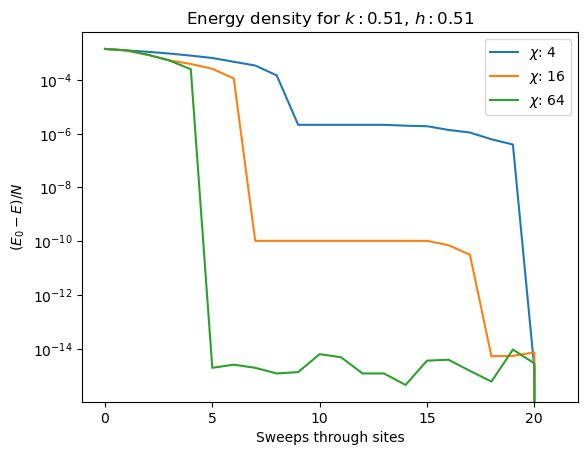

In [ ]:
for i, ed in enumerate(en_dens):
    plt.plot(ed, label=f"$\chi$: {chis[i]}")
plt.legend()
plt.title(f"Energy density for ${param_labels[0]}:{target_param[0]}$, ${param_labels[1]}:{target_param[1]}$")
plt.ylabel("$(E_0 - E)/N$")
plt.xlabel("Sweeps through sites")
plt.yscale('log')
plt.show()

### 2. All points plot

In [ ]:
model = "Cluster"
path = "mac"
L = 12
npoints = 16
chis = [2]
hx_i = 0.01
hx_f = 1.5
hy_i = 0.01
hy_f = 1.5
hxs = np.linspace(hx_i, hx_f, npoints)
hys = np.linspace(hy_i, hy_f, npoints)
num = (hx_f - hx_i) / npoints
precision = get_precision(num)

if model == "Ising":
    model_path = "0_ISING"
    param_labels = ["h","J"]

elif model == "Z2":
    model_path = "1_Z2"
    param_labels = ["g","J"]

elif model == "ANNNI":
    model_path = "2_ANNNI"
    param_labels = ["k","h"]

elif model == "Cluster":
    model_path = "3_CLUSTER"
    param_labels = ["h","J"]
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f"/Users/fradm/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

In [ ]:
en_dens = []
for chi in chis:
    energies = np.load(f"{parent_path}/results/energy_data/energies_{model}_L_{L}_{param_labels[0]}_{hx_i}-{hx_f}_{param_labels[1]}_{hy_i}-{hy_f}_delta_{npoints}_chi_{chi}.npy")

    en_dens_chi = [np.abs(energies[i,j,-1] - energies[i,j]) for j,hy in enumerate(hys) for i,hx in enumerate(hxs)]
    en_dens_chi = np.asarray(en_dens_chi)
    # en_dens_chi = np.mean(en_dens_chi, axis=-1)
    # en_dens_chi_std = np.std(en_dens_chi, axis=-1)
    en_dens_chi = np.sum(en_dens_chi, axis=-1)
    en_dens_chi = en_dens_chi.reshape((npoints,npoints))
    en_dens.append(en_dens_chi)

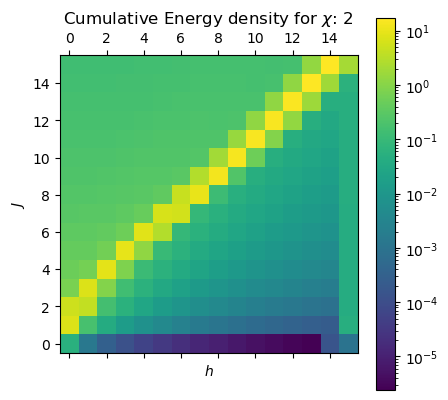

In [ ]:
for i, ed in enumerate(en_dens):
    # end = []
    # for e in ed:
    #     e = e[::-1]
    #     end.append(e)
    # end = np.asarray(end[::-1]).T
    plt.matshow(ed, origin='lower', norm=colors.LogNorm(vmin=np.min(ed)+1e-15, vmax=np.max(ed)))
    # plt.matshow(end, origin='lower', norm=colors.LogNorm(
    #                                           vmin=np.min(ed)+1e-15, vmax=np.max(ed)))
    plt.title(f"Cumulative Energy density for $\chi$: {chis[i]}")
    plt.ylabel(f"${param_labels[1]}$")
    plt.xlabel(f"${param_labels[0]}$")
    plt.colorbar()
plt.show()